In [8]:
SEED = 666

from random import normalvariate
from random import uniform
from math import sqrt

import seaborn as sns
from matplotlib import pyplot as plt

sns.set() # Setting seaborn as default style even if use only matplotlib
sns.set(rc={'figure.figsize':(20,15)})

In [42]:
class MathModel:
    """
    Generic class defining a mathematical model object.
    """
    def __init__(self):
        self.dataset_parameters = dict()
        self.dataset_parameters['p'] = None
        self.dataset_parameters['n'] = None
        self.parameters = dict()
        self.statisticals = dict()

class SimpleLinearRegressor(MathModel):
    """
    Simple Linear Regressor object: n = 1. 
    """
        
    def fit(self, X, Y):
        """
        Fits Y to X and calculates some error metrics and statisticals.
        
        INPUT: 
        X: list of predictor values
        Y: list of response values
        
        OUTPUT:
        """
        n = len(X)
        p = 1
        
        X_mean, Y_mean = mean(X), mean(Y)
        
        slope_numerator   = sum([(x - X_mean) * (y - Y_mean) for x, y in zip(X,Y)])
        slope_denominator = sum([(x - X_mean)**2 for x in X])
        
        slope = slope_numerator / slope_denominator
        intercept = Y_mean - slope * X_mean
        
        RSS = sum([(y - (intercept + slope * x))**2 for x, y in zip(X,Y)])
        RSE = sqrt(RSS / (n - 2))
        
        slope_SE = sqrt((RSE**2) * ((1/n) + (X_mean**2 / slope_denominator)))
        intercept_SE = sqrt((RSE**2) / slope_denominator)
        
        slope_CI = (slope - 2 * slope_SE, slope + 2 * slope_SE)
        intercept_CI = (intercept - 2 * intercept_SE, intercept + 2 * intercept_SE)
        
        try:
            t_statistic = slope / slope_SE
        except:
            t_statistic = None # to prevent a crash when slope_SE = 0
            
        p_value = None
            
        # Assign class attributes if everything went OK.
        
        self.dataset_parameters['n'] = n
        self.dataset_parameters['p'] = p
        
        self.parameters['slope'] = slope
        self.parameters['intercept'] = intercept
        
        self.statisticals['RSS'] = RSS
        self.statisticals['RSE'] = RSE
        self.statisticals['slope_SE'] = slope_SE
        self.statisticals['intercept_SE'] = intercept_SE
        self.statisticals['slope_CI'] = slope_CI
        self.statisticals['intercept_CI'] = intercept_CI
        self.statisticals['t_statistic'] = t_statistic
    
    def predict(self, X):
        return [self.parameters['intercept'] + self.parameters['slope'] * x for x in X]
    
    def plot(self, X, Y):
        """
        Plots the data, the line of best fit and the residuals.
        """
        
        Y_pred = self.predict(X)
        residuals =  residuals = [y - y_pred for y, y_pred in zip(Y, Y_pred)]
        
        fig, axes = plt.subplots(2, 1)
        
        fig.suptitle('Linear regression summary plots')
        axes[0].set_title('Data and line of best fit')
        axes[1].set_title('Residuals plot')
        
        sns.scatterplot(ax = axes[0], x = X, y = Y)
        sns.lineplot(ax = axes[0], x = X, y = Y_pred)
        sns.scatterplot(ax = axes[1], x = X, y = residuals)
    

def generate_dataset(n = 30, x_min = -1, x_max = 1, slope = 1, intercept = 1, e_mean = 0, e_std = 0.05):
    """
    Generates a dataset according to the input parameters
    
    Keyword Arguments:
    n:            number of observations
    x_min, x_max: limits of the preditor's range (x_min <= x <= x_max)
    slope:        slope of the true linear model
    intercept:    intercept of the true linear model
    e_mean:       error term mean
    e_std:        error term standard deviation
    
    Output:
    X: predictor values
    Y: response values
    """
    
    X = tuple(uniform(x_min,x_max) for _ in range(n))
    Y = tuple(intercept + slope * x + normalvariate(e_mean,e_std) for x in X)
    
    return X, Y
    
def mean(L):
    """Returns the mean of the elements of a list."""
    return sum(L)/len(L)

def linear_regression(X, Y):
    """
    Simple linear regression Y on X.
    
    Keyword Arguments:
    X: the predictor
    Y: the response
    
    Output:
    slope:        slope of the line of best fit
    intercept:    intercept of the line of best fit
    Y_pred:       model predictions for X
    RSS:          residual sum of squares of the model
    slope_SE:     standard error of the slope
    intercept_SE: standard error of the intercept
    slope_CI:     95% confidence interval of the slope
    intercept_CI: 95% condidence interval of the intercept
    t_statistic:  
    """
    
    n = len(X)
    X_mean, Y_mean = mean(X), mean(Y)
    
    slope_numerator   = sum([(x - X_mean) * (y - Y_mean) for x, y in zip(X,Y)])
    slope_denominator = sum([(x - X_mean)**2 for x in X])
    
    slope     = slope_numerator / slope_denominator
    intercept = Y_mean - slope * X_mean
    
    Y_pred = [intercept + slope * x for x in X]
    
    residuals = [y - y_pred for y, y_pred in zip(Y, Y_pred)]
    
    RSS = sum([(y - (intercept + slope * x))**2 for x, y in zip(X,Y)])
    RSE = sqrt(RSS / (n - 2))
    
    
    slope_SE     = sqrt((RSE**2) * ((1/n) + (X_mean**2 / slope_denominator)))
    intercept_SE = sqrt((RSE**2) / slope_denominator)
    
    slope_CI = [slope - 2 * slope_SE, slope + 2 * slope_SE]
    intercept_CI = [intercept - 2 * intercept_SE, intercept + 2 * intercept_SE]
    
    try:
        t_statistic = slope / slope_SE
    except:
        t_statistic = None # bug when slope_SE = 0
    
 
    return slope, intercept, Y_pred, residuals, RSS, slope_SE, intercept_SE, slope_CI, intercept_CI, t_statistic

{'dataset_parameters': {'p': None, 'n': None}, 'parameters': {}, 'statisticals': {}}
(0.9615159986108355, -0.00460553416278775, -0.14799088027544238, -0.17594791602427162, 0.4214447132035233, 0.203042660342869, -0.10014590996893413, -0.2346109938266443, -0.06349196138492497, -0.8995185945265751, 0.5239524031065215, 0.028845088160003307, -0.13379179270378772, 0.4726076675944324, 0.6331673513934932, 0.6331383325146984, -0.3939418864245938, 0.12962963274162198, -0.287846327611889, 0.7341405300238113, -0.035576672172743073, -0.3672019957193271, 0.6180614929911772, 0.7929455567573827, -0.4236731012180346, -0.014858565960113479, -0.39206369781620953, 0.5710514774298658, -0.36124571846377873, 0.857342773063211) (2.0282297045368782, 0.881194865556811, 0.815795257164917, 0.8073097217622548, 1.468974231175423, 1.1668034710826674, 0.9364916617305334, 0.7763707516138236, 0.9601297487563102, 0.09233747008104401, 1.556149567678098, 1.0596958113821622, 0.9426010551200894, 1.460867232923274, 1.7405541

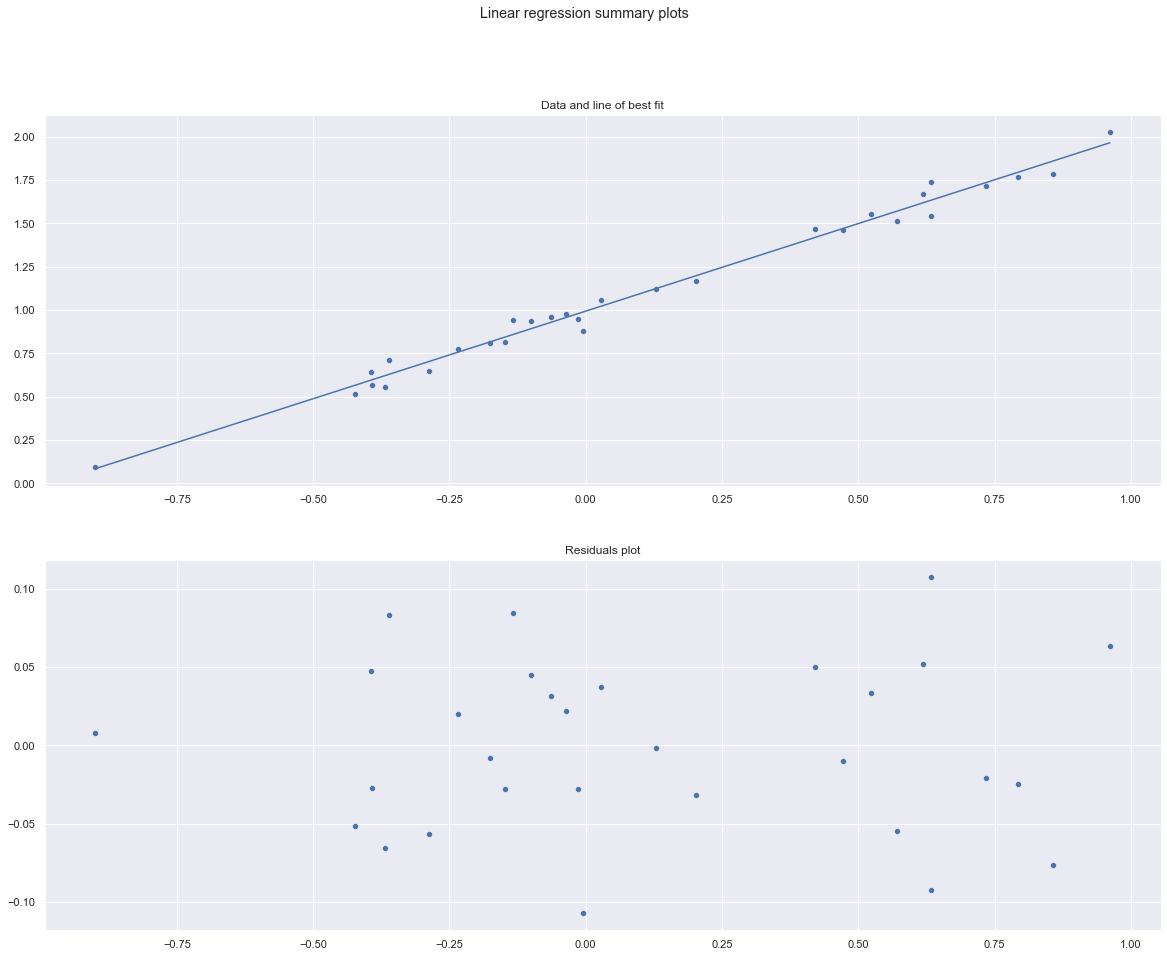

In [45]:
model_1 = SimpleLinearRegressor()
print(model_1.__dict__)
X, Y = generate_dataset()
print(X, Y)
model_1.fit(X,Y)
print(model_1.__dict__)
model_1.plot(X,Y)

In [5]:
print("""
NEXT FEATURES
refactor code -> from function to class
p-value

DONE
""")


NEXT FEATURES
refactor code -> from function to class

DONE
add residuals, Y_pred
add plots (data vs linear fit, residuals)
fix bug



In [84]:
linear_regression([0,1,2,3,4],[1,3,5,7,9])

X, Y = generate_dataset(30,-10,10,1,0,0,0.5)

slope, intercept, Y_pred, residuals, RSS, slope_SE, intercept_SE, slope_CI, intercept_CI, t_statistic = linear_regression(X,Y)

In [18]:
X, Y = generate_dataset(30,-10,10,1,0,0,0.5)
linear_model_1 = LinearRegression(X,Y)
print(type(linear_model_1))
linear_model_1.__dict__

<class '__main__.LinearRegression'>


{'X': [-1.4255863540700968,
  -2.086192844220129,
  6.712222554014005,
  -5.26299576244023,
  -2.8834905877704964,
  -7.160740532359265,
  -3.933017410818451,
  -6.625451863659492,
  7.936475466815121,
  -3.3859666730762727,
  2.416558546315418,
  9.277914886793628,
  8.504560401249424,
  2.409136127041764,
  8.25861521986944,
  -5.526095214469031,
  7.056929152709202,
  -3.2396516164700344,
  -5.8867517444566575,
  1.0077189468128473,
  -5.9286127556331465,
  -9.436741170825977,
  4.213658408946731,
  -3.855679966881511,
  -0.7660648662763911,
  2.3671882756868072,
  -8.909069421821357,
  1.2000577050047223,
  3.2014058747442515,
  3.683826051023402],
 'Y': [-0.5880479748264141,
  -1.4098318353126338,
  7.047267209916374,
  -5.3589226921603625,
  -1.9787260143284828,
  -6.743012108456335,
  -4.895363331419255,
  -7.462692325572512,
  7.714821992212882,
  -3.8735690798860545,
  1.7121671717679445,
  9.411303605966587,
  8.715761001710664,
  2.2333064014144814,
  8.829539337503588,
  -5

<AxesSubplot:title={'center':'Residuals plot'}>

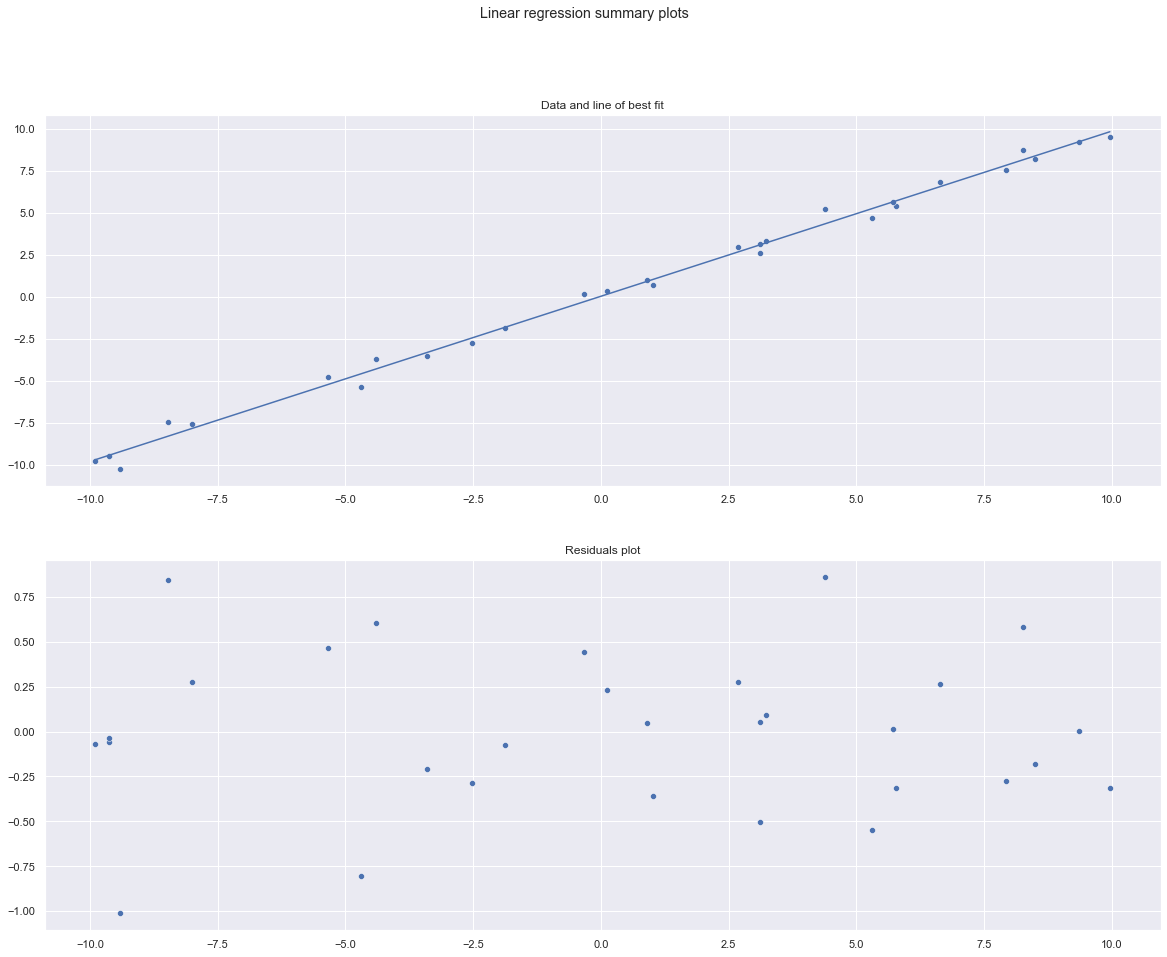

In [85]:
fig, axes = plt.subplots(2, 1)

fig.suptitle('Linear regression summary plots')
axes[0].set_title('Data and line of best fit')
axes[1].set_title('Residuals plot')

sns.scatterplot(ax = axes[0], x = X, y = Y)
sns.lineplot(ax = axes[0], x = X, y = Y_pred)
sns.scatterplot(ax = axes[1], x = X, y = residuals)

In [17]:
help(mean)
help(linear_regression)
help(generate_dataset)

Help on function mean in module __main__:

mean(L)
    Returns the mean of the elements of a list.

Help on function linear_regression in module __main__:

linear_regression(X, Y)
    Simple linear regression Y on X.
    
    Keyword Arguments:
    X: the predictor
    Y: the response
    
    Output:
    slope:        slope of the line of best fit
    intercept:    intercept of the line of best fit
    RSS:          residual sum of squares of the model
    slope_SE:     standard error of the slope
    intercept_SE: standard error of the intercept
    slope_CI:     95% confidence interval of the slope
    intercept_CI: 95% condidence interval of the intercept
    t_statistic:

Help on function generate_dataset in module __main__:

generate_dataset(n, x_min, x_max, slope, intercept, e_mean, e_std)
    Generates a dataset according to the input parameters
    
    Keyword Arguments:
    n:            number of observations
    x_min, x_max: limits of the preditor's range (x_min <= x <= x

In [7]:
n = 2
print(n,n.__dict__)

AttributeError: 'int' object has no attribute '__dict__'